In [1]:
%matplotlib inline

In [3]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.image import BboxImage, imread
from matplotlib.transforms import Bbox
from PIL import Image
import seaborn as sns

In [49]:
# read images
mpl.rcParams["savefig.dpi"] = mpl.rcParams["figure.dpi"]
IMG_ROOT = "./images"

image_paths = os.listdir("./images")
image_paths = [os.path.join(IMG_ROOT, p) for p in image_paths]
images = [Image.open(p) for p in image_paths]
print(images)

[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=64x64 at 0x10BA6F780>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=64x64 at 0x10BA6FA20>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=64x64 at 0x10BA6FB00>]


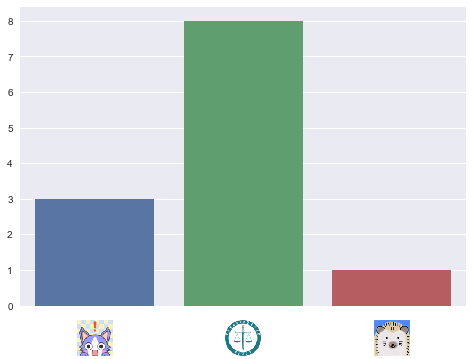

In [108]:
# show graph

y = np.random.randint(10, size=len(images))
x = np.array(range(len(images)))
ax = sns.barplot(x=x, y=y, ci=None)

# erase ticks
ax.get_xaxis().set_ticklabels([])
TICK_POS = -0.3
SIZE_IN_TICK = 1

scale = ax.transData.transform((1, 1)) - ax.transData.transform((0, 0))
x_scale = scale[0] / scale[1]

for i, _x in enumerate(x):
    label_x = (_x  - 0.35)  # 0.35 is left side interval
    left = label_x - (SIZE_IN_TICK / x_scale / 2)
    down = TICK_POS - SIZE_IN_TICK
    right = label_x + (SIZE_IN_TICK / x_scale / 2)
    top = TICK_POS
    leftDown = ax.transData.transform((left, down))
    rightUpper = ax.transData.transform((right, top))
    bbox_image = BboxImage(Bbox([leftDown, rightUpper]),
                           norm = None,
                           origin=None,
                           clip_on=False
                          )
    bbox_image.set_data(images[i])
    ax.add_artist(bbox_image)
